In [17]:
import tensorflow as tf
print("GPU Available: ", tf.config.list_physical_devices('GPU'))


GPU Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# ImageDataGenerator ile veri yükleme
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

# Eğitim ve doğrulama veri yükleyicileri
train_generator = train_datagen.flow_from_directory(
    '../Organized_Damage_Level/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = valid_datagen.flow_from_directory(
    '../Organized_Damage_Level/valid',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 3427 images belonging to 4 classes.
Found 1096 images belonging to 4 classes.


In [21]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Transfer öğrenme modeli
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(class_mapping), activation='softmax')(x)  # Sınıf sayısı kadar çıkış
model = Model(inputs=base_model.input, outputs=predictions)

# Temel modelin ağırlıklarını dondurma
for layer in base_model.layers:
    layer.trainable = False

# Modeli derleme
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [22]:
# Modeli eğitme
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator
)

Epoch 1/20
108/108 [==============================] - 34s 235ms/step - loss: 1.1024 - accuracy: 0.5206 - val_loss: 0.9729 - val_accuracy: 0.5821
Epoch 2/20
108/108 [==============================] - 24s 226ms/step - loss: 0.9727 - accuracy: 0.5871 - val_loss: 0.9530 - val_accuracy: 0.5693
Epoch 3/20
108/108 [==============================] - 23s 217ms/step - loss: 0.9293 - accuracy: 0.6032 - val_loss: 0.9286 - val_accuracy: 0.5931
Epoch 4/20
108/108 [==============================] - 22s 207ms/step - loss: 0.9085 - accuracy: 0.6154 - val_loss: 0.9082 - val_accuracy: 0.6159
Epoch 5/20
108/108 [==============================] - 23s 217ms/step - loss: 0.9073 - accuracy: 0.6104 - val_loss: 0.9020 - val_accuracy: 0.6104
Epoch 6/20
108/108 [==============================] - 23s 210ms/step - loss: 0.8902 - accuracy: 0.6119 - val_loss: 0.9673 - val_accuracy: 0.5830
Epoch 7/20
108/108 [==============================] - 23s 209ms/step - loss: 0.8850 - accuracy: 0.6285 - val_loss: 0.9030 - val_ac

In [ ]:
# Eğitim ve doğrulama sonuçlarını kaydetme
model.save('damage_classification_model_augmented.h5')

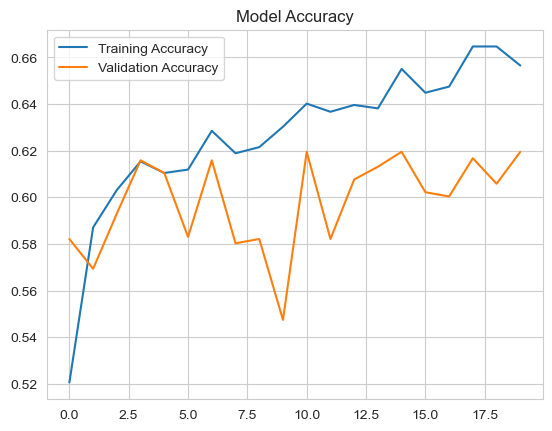

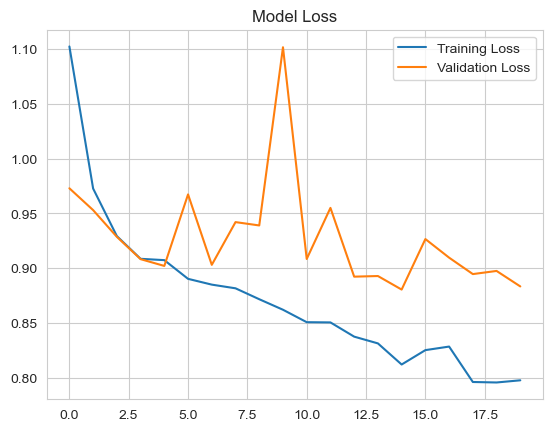

In [23]:
# Eğitim doğruluğu ve kaybını çizme
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# Modeli kaydetme
model.save('damage_classification_model.h5')
